<a href="https://colab.research.google.com/github/newbiepawel/Hello-Github/blob/master/LuxMed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
from google.colab import files
uploaded = files.upload()

Saving fakty.csv to fakty (1).csv


In [80]:
import warnings
warnings.filterwarnings('ignore')

In [83]:
import io
import pandas as pd
import numpy as np

fakty = pd.read_csv(io.BytesIO(uploaded['fakty.csv']), sep =';')
fakty.head()

,PER_ID,LINE_ID,UNIT_ID,VER_ID,CAT_ID,DRV_ID,INTCO_ID,PROJ_ID,ACC_ID,DT_UNIT_ID,DT_DRV_ID,DT_PROJ_ID,DT_GRUPA_KAPITALOWA_ID,DT_CUST_ID,VALUE
0,201201,25668,8103,900,4001,10503,0,111869207,0,20934,126,111869207,990,31869,90.0
1,201201,25668,8103,900,4001,10503,0,111869207,0,20934,127,111869207,736,30695,30.0
2,201201,25668,8103,900,4001,10503,0,111869207,0,20934,127,111869207,1059,39186,30.0
3,201201,25668,8103,900,4001,10503,0,111869207,0,20934,127,111869207,1150,46896,30.0
4,201201,25668,8103,900,4001,10503,0,111869207,0,20934,128,111869207,669,35369,10.0


Posortowanie danych po id klienta i dacie

In [7]:
fakty = fakty.sort_values(['DT_CUST_ID', 'PER_ID'])
fakty.head()

,PER_ID,LINE_ID,UNIT_ID,VER_ID,CAT_ID,DRV_ID,INTCO_ID,PROJ_ID,ACC_ID,DT_UNIT_ID,DT_DRV_ID,DT_PROJ_ID,DT_GRUPA_KAPITALOWA_ID,DT_CUST_ID,VALUE
256828,201201,25664,8308,900,4001,0,0,111869165,0,-8308,0,111869165,0,0,0.0
257405,201201,25664,8103,900,4003,0,0,111869226,0,-8103,0,111869226,0,0,0.0
922209,201202,25664,8103,900,4003,0,0,111869226,0,-8103,0,111869226,0,0,0.0
785152,201203,25664,8103,900,4003,0,0,111869226,0,-8103,0,111869226,0,0,0.0
875483,201204,25664,8103,900,4003,0,0,111869226,0,-8103,0,111869226,0,0,0.0


In [276]:
fakty.shape

(1048575, 15)

Brak nulli w danych

In [277]:
fakty.isnull().sum()

PER_ID                    0
LINE_ID                   0
UNIT_ID                   0
VER_ID                    0
CAT_ID                    0
DRV_ID                    0
INTCO_ID                  0
PROJ_ID                   0
ACC_ID                    0
DT_UNIT_ID                0
DT_DRV_ID                 0
DT_PROJ_ID                0
DT_GRUPA_KAPITALOWA_ID    0
DT_CUST_ID                0
VALUE                     0
dtype: int64

Liczba unikalnych wartośći dla każdej zmiennej

In [ ]:
for col in fakty.columns:
    print(col, ': ', len(fakty[col].unique()), ' unique values')

PER_ID :  33  unique values
LINE_ID :  5  unique values
UNIT_ID :  2  unique values
VER_ID :  1  unique values
CAT_ID :  9  unique values
DRV_ID :  23  unique values
INTCO_ID :  1  unique values
PROJ_ID :  38  unique values
ACC_ID :  1  unique values
DT_UNIT_ID :  379  unique values
DT_DRV_ID :  136  unique values
DT_PROJ_ID :  38  unique values
DT_GRUPA_KAPITALOWA_ID :  901  unique values
DT_CUST_ID :  4500  unique values
VALUE :  1166  unique values
cat_id_name :  9  unique values


Unikalne wartości LINE_ID

In [ ]:
fakty['LINE_ID'].unique()

array([25664, 25668, 25666, 25667, 25672])

In [ ]:
print('procent obserwacji gdzie LINE_ID = 25664:',str(np.round((len(fakty[fakty['LINE_ID']== 25664])/len(fakty)*100),2))+'%')
print('procent obserwacji gdzie LINE_ID = 25668:',str(np.round((len(fakty[fakty['LINE_ID']== 25668])/len(fakty)*100),2))+'%')
print('procent obserwacji gdzie LINE_ID = 25666:',str(np.round((len(fakty[fakty['LINE_ID']== 25666])/len(fakty)*100),2))+'%')
print('procent obserwacji gdzie LINE_ID = 25667:',str(np.round((len(fakty[fakty['LINE_ID']== 25667])/len(fakty)*100),2))+'%')
print('procent obserwacji gdzie LINE_ID = 25672:',str(np.round((len(fakty[fakty['LINE_ID']== 25672])/len(fakty)*100),2))+'%')

procent obserwacji gdzie LINE_ID = 25664: 8.77%
procent obserwacji gdzie LINE_ID = 25668: 30.01%
procent obserwacji gdzie LINE_ID = 25666: 26.6%
procent obserwacji gdzie LINE_ID = 25667: 25.8%
procent obserwacji gdzie LINE_ID = 25672: 8.81%


ARPU

Wzór (na podstawie line_id): 25672 / 25664

Opis: Średni przychód na abonenta.

Uwagi:
Tylko dla cat_id typu Abonament% lub CoPayment%. W przypadku kalkulacji za okres dłuższy niż 1 miesiąc, jest to średnia ważona liczbą abonentów.


Stworzenie listy DT_CUST_ID dla których występuje LINE_ID = 25672 i 25664

In [8]:
a = fakty[fakty['LINE_ID'] ==25672]['DT_CUST_ID'].unique()
b = fakty[fakty['LINE_ID'] ==25664]['DT_CUST_ID'].unique()
c = []
for i in fakty['DT_CUST_ID'].unique():
  if (i in a) & (i in b):
    c.append(i)

Stworzenie dodatkowej zmiennej(cat_id_name) dla łatwiejszego filtrowania zmiennych dla cat_D typu Abonament% lub CoPayment%

Na podstawie:

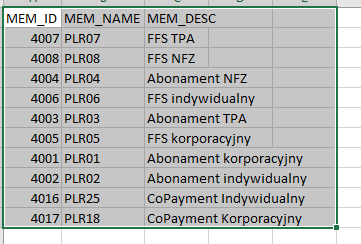

In [9]:
slownik= {4004: 'Abonament NFZ', 4003: 'Abonament TPA', 4001: 'Abonament korporacyjny', 4002: 'Abonament indywidualny',
          4016: 'CoPayment Indywidualny', 4017: 'CoPayment Korporacyjny', 4007: 'FFS TPA', 4008: 'FFS NFZ', 4006: 'FFS indywidualny',
          4005: 'FFS korporacyjny'}

fakty['cat_id_name'] = fakty['CAT_ID'].map(slownik)
fakty.head(10)        

,PER_ID,LINE_ID,UNIT_ID,VER_ID,CAT_ID,DRV_ID,INTCO_ID,PROJ_ID,ACC_ID,DT_UNIT_ID,DT_DRV_ID,DT_PROJ_ID,DT_GRUPA_KAPITALOWA_ID,DT_CUST_ID,VALUE,cat_id_name
256828,201201,25664,8308,900,4001,0,0,111869165,0,-8308,0,111869165,0,0,0.0,Abonament korporacyjny
257405,201201,25664,8103,900,4003,0,0,111869226,0,-8103,0,111869226,0,0,0.0,Abonament TPA
922209,201202,25664,8103,900,4003,0,0,111869226,0,-8103,0,111869226,0,0,0.0,Abonament TPA
785152,201203,25664,8103,900,4003,0,0,111869226,0,-8103,0,111869226,0,0,0.0,Abonament TPA
875483,201204,25664,8103,900,4003,0,0,111869226,0,-8103,0,111869226,0,0,0.0,Abonament TPA
197459,201205,25664,8103,900,4003,0,0,111869226,0,-8103,0,111869226,0,0,0.0,Abonament TPA
1035522,201207,25664,8103,900,4003,0,0,111869226,0,-8103,0,111869226,0,0,0.0,Abonament TPA
455696,201208,25668,8103,900,4001,10503,0,117848295,0,24090,122,117848295,0,0,10.0,Abonament korporacyjny
455708,201208,25668,8103,900,4001,10503,0,117848295,0,24090,123,117848295,0,0,10.0,Abonament korporacyjny
465965,201209,25668,8103,900,4001,11511,0,111869219,0,20942,20,111869219,0,0,70.0,Abonament korporacyjny


Stworzenie nowego data frame(df), dla klientów, dla których występuje LINE_ID:25672 oraz 25664 i cat_id Abonament% lub CoPayment%(jak w treści zadania)

In [10]:
df = fakty[(fakty['DT_CUST_ID'].isin(c)) & ((fakty['cat_id_name'][0][0] == 'A') or (fakty['cat_id_name'][0][0] == 'C'))]
df.shape, fakty.shape

((1035356, 16), (1048575, 16))

In [ ]:
df.head()

,PER_ID,LINE_ID,UNIT_ID,VER_ID,CAT_ID,DRV_ID,INTCO_ID,PROJ_ID,ACC_ID,DT_UNIT_ID,DT_DRV_ID,DT_PROJ_ID,DT_GRUPA_KAPITALOWA_ID,DT_CUST_ID,VALUE,cat_id_name
256828,201201,25664,8308,900,4001,0,0,111869165,0,-8308,0,111869165,0,0,0.0,Abonament korporacyjny
257405,201201,25664,8103,900,4003,0,0,111869226,0,-8103,0,111869226,0,0,0.0,Abonament TPA
922209,201202,25664,8103,900,4003,0,0,111869226,0,-8103,0,111869226,0,0,0.0,Abonament TPA
785152,201203,25664,8103,900,4003,0,0,111869226,0,-8103,0,111869226,0,0,0.0,Abonament TPA
875483,201204,25664,8103,900,4003,0,0,111869226,0,-8103,0,111869226,0,0,0.0,Abonament TPA


Tworzenie wskażnika ARPU po DT_CUST_ID(gdzie grupa kapitalowa = 0)

In [11]:
arpu = df[(df['LINE_ID']==25672)& (df['DT_GRUPA_KAPITALOWA_ID'] ==0)].groupby('DT_CUST_ID')['VALUE'].sum()/\
df[(df['LINE_ID'] == 25664) &(df['DT_GRUPA_KAPITALOWA_ID']==0)].groupby('DT_CUST_ID')['VALUE'].sum()
arpu = pd.DataFrame(arpu)
arpu.reset_index(inplace=True)
arpu.head()

,DT_CUST_ID,VALUE
0,0,0.0
1,669,NaN
2,2451,inf
3,40093,inf
4,44551,51.0


Powód wartości NaN: brak jednego z LINE_ID niezbędnych do wyliczenia ARPU dla danego DT_CUST_ID

In [ ]:
df[(df['DT_CUST_ID']== 669) & (df['DT_GRUPA_KAPITALOWA_ID'] ==0)]['LINE_ID'].unique()

array([25668, 25666, 25664])

Powód, dla którego wsytępują wartości "inf" to skutek tego, że dzieli się coś czego nie ma przez jakąś wartość. Przykład: dla kontrahenta o id = 669 gdzie nie ma grupy kapitałowej nie występują obserwacje z LINE_ID = 25672, zatem chcąc wyliczyć ARPU dzielimy coś co nie występuje przez wartości gdzie występuje LINE_ID =25664. Moim zdaniem rozsądnym rozwiązaniem jest tutaj przypisanie wartości 0 w takiej sytuacji. 

Tworzeni wskażnika ARPU po grupie kapitałowej(gdzie DT_GRUPA_KAPITALOWA_ID nie jest 0)

In [12]:
arpu2 = df[(df['LINE_ID']==25672)& (df['DT_GRUPA_KAPITALOWA_ID'] !=0)].groupby('DT_GRUPA_KAPITALOWA_ID')['VALUE'].sum()/df[(df['LINE_ID'] == 25664)\
&(df['DT_GRUPA_KAPITALOWA_ID']!=0)].groupby('DT_GRUPA_KAPITALOWA_ID')['VALUE'].sum()
arpu2 = pd.DataFrame(arpu2)
arpu2.reset_index(inplace=True)
arpu2.head()

,DT_GRUPA_KAPITALOWA_ID,VALUE
0,202,61.729167
1,203,35.045161
2,204,inf
3,205,49.291667
4,206,29.196970


Uzupełnienie tabeli fakty w dwie dodatkowe kolumny(poniżej złącze je w jedną) dla ARPU po DT_CUST_ID i osobna po grupie kapitałowej

In [13]:
fakty = fakty.merge(arpu, on = 'DT_CUST_ID', how = 'left')
fakty.rename(columns={"VALUE_x": "VALUE", "VALUE_y": "ARPU"}, inplace=True)
fakty = fakty.merge(arpu2, on = 'DT_GRUPA_KAPITALOWA_ID', how = 'left')
fakty.rename(columns={"VALUE_x": "VALUE", "VALUE_y": "ARPU2"}, inplace=True)
fakty.head()

,PER_ID,LINE_ID,UNIT_ID,VER_ID,CAT_ID,DRV_ID,INTCO_ID,PROJ_ID,ACC_ID,DT_UNIT_ID,DT_DRV_ID,DT_PROJ_ID,DT_GRUPA_KAPITALOWA_ID,DT_CUST_ID,VALUE,cat_id_name,ARPU,ARPU2
0,201201,25664,8308,900,4001,0,0,111869165,0,-8308,0,111869165,0,0,0.0,Abonament korporacyjny,0.0,NaN
1,201201,25664,8103,900,4003,0,0,111869226,0,-8103,0,111869226,0,0,0.0,Abonament TPA,0.0,NaN
2,201202,25664,8103,900,4003,0,0,111869226,0,-8103,0,111869226,0,0,0.0,Abonament TPA,0.0,NaN
3,201203,25664,8103,900,4003,0,0,111869226,0,-8103,0,111869226,0,0,0.0,Abonament TPA,0.0,NaN
4,201204,25664,8103,900,4003,0,0,111869226,0,-8103,0,111869226,0,0,0.0,Abonament TPA,0.0,NaN


Jako, że uzupełniałem tabele fakty w nową kolumne ARPU i ARPU2 po DT_CUST_ID muszę jeszcze zaaplikować poniższy kod

In [14]:
fakty['ARPU2'][fakty['DT_GRUPA_KAPITALOWA_ID']==0] = 0
fakty['ARPU'][fakty['DT_GRUPA_KAPITALOWA_ID']!=0] = 0

Wspomniany wcześniej problem z wartościami inf(infinity) czyli wartość maxymalna. Zmiana wartości inf na 0

In [285]:
fakty['ARPU'].max()

inf

In [15]:
fakty['ARPU'][fakty['ARPU']==fakty['ARPU'].max()] =0
fakty['ARPU'].max()

51.0

In [287]:
fakty['ARPU2'].max()

inf

In [16]:
fakty['ARPU2'][fakty['ARPU2']==fakty['ARPU2'].max()] = 0
fakty['ARPU2'].max()

2516.5

In [17]:
fakty['ARPU'].fillna(0, inplace = True)
fakty['ARPU2'].fillna(0, inplace = True)

Upewniam się czy nie popełniłem i czy kolumna ARPU(po DT_CUST_ID) jak nie jest równa zero to czy kolumna ARPU2(po grupie kapitałowej) też nie jest zero.
Nie występuje taka sytuacja

In [18]:
fakty[(fakty['ARPU'] !=0) & (fakty['ARPU2']!=0)].head()

,PER_ID,LINE_ID,UNIT_ID,VER_ID,CAT_ID,DRV_ID,INTCO_ID,PROJ_ID,ACC_ID,DT_UNIT_ID,DT_DRV_ID,DT_PROJ_ID,DT_GRUPA_KAPITALOWA_ID,DT_CUST_ID,VALUE,cat_id_name,ARPU,ARPU2


Łączę kolumne ARPU i ARPU2 w jedną ARPU.
Jako, że sprawdziłem, że jeżeli w ARPU wartość jest różna od zera to w ARPU nie występuje wartość różna od zera.

In [19]:
fakty['ARPU'] = fakty['ARPU']+fakty['ARPU2']
fakty.drop(['ARPU2'], axis = 1, inplace=True)
fakty.head()

,PER_ID,LINE_ID,UNIT_ID,VER_ID,CAT_ID,DRV_ID,INTCO_ID,PROJ_ID,ACC_ID,DT_UNIT_ID,DT_DRV_ID,DT_PROJ_ID,DT_GRUPA_KAPITALOWA_ID,DT_CUST_ID,VALUE,cat_id_name,ARPU
0,201201,25664,8308,900,4001,0,0,111869165,0,-8308,0,111869165,0,0,0.0,Abonament korporacyjny,0.0
1,201201,25664,8103,900,4003,0,0,111869226,0,-8103,0,111869226,0,0,0.0,Abonament TPA,0.0
2,201202,25664,8103,900,4003,0,0,111869226,0,-8103,0,111869226,0,0,0.0,Abonament TPA,0.0
3,201203,25664,8103,900,4003,0,0,111869226,0,-8103,0,111869226,0,0,0.0,Abonament TPA,0.0
4,201204,25664,8103,900,4003,0,0,111869226,0,-8103,0,111869226,0,0,0.0,Abonament TPA,0.0


In [292]:
fakty[fakty['ARPU']==0]['PER_ID'].count()/len(fakty)

0.025665307679469757

Z powowdu kilka outlierów wizualizacja jest nieczytelna.
Poniżej spróbuję zwizualizować wskażnik ARPU do 0.99 i 0.95 kwantyla

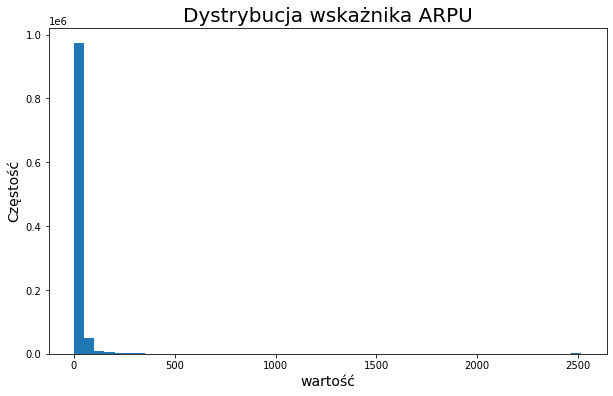

In [293]:
plt.figure(figsize = (10,6))
plt.title(label = 'Dystrybucja wskażnika ARPU', fontsize = 20)
plt.xlabel(xlabel = 'wartość', fontsize = 14)
plt.ylabel(ylabel = 'Częstość', fontsize = 14)
plt.hist(fakty['ARPU'], bins = 50);

In [294]:
fakty['ARPU'].quantile(0.99)

210.0

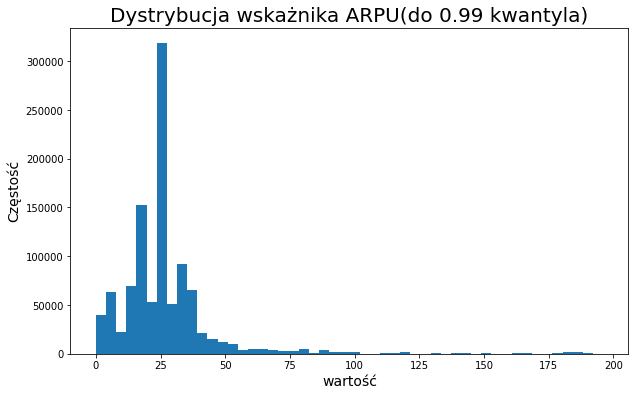

In [295]:
plt.figure(figsize = (10,6))
plt.title(label = 'Dystrybucja wskażnika ARPU(do 0.99 kwantyla)', fontsize = 20)
plt.xlabel(xlabel = 'wartość', fontsize = 14)
plt.ylabel(ylabel = 'Częstość', fontsize = 14)
plt.hist(fakty['ARPU'][fakty['ARPU'] < fakty['ARPU'].quantile(0.99)], bins = 50);

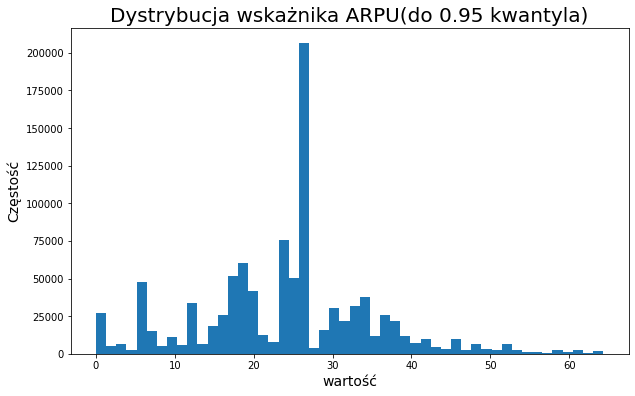

In [296]:
plt.figure(figsize = (10,6))
plt.title(label = 'Dystrybucja wskażnika ARPU(do 0.95 kwantyla)', fontsize = 20)
plt.xlabel(xlabel = 'wartość', fontsize = 14)
plt.ylabel(ylabel = 'Częstość', fontsize = 14)
plt.hist(fakty['ARPU'][fakty['ARPU'] < fakty['ARPU'].quantile(0.95)], bins = 50);

In [20]:
 from scipy.stats import mode

Ze względu na bardzo duże wartości odstające postanowiłem w statystykach opisowych nie uwzględniać średniej gdyż "zakłamie" ona obraz rozkładu miary ARPU, zamiast tego użyję mediany wykorzystując bibliotekę scipy

In [322]:
print('Minimalna wartość ARPU:', fakty['ARPU'].min(),'\n',
      'Mediana:', mode(fakty['ARPU'])[0], '\n',
      'Maksymalna wartość:', fakty['ARPU'].max())

Minimalna wartość ARPU: 0.0 
 Mediana: [26.69839557] 
 Maksymalna wartość: 2516.5


##Szkodowość
Wzór(na podstawie line_id):25666 / 25664

Opis:Średnia miesięczna liczba usług wykonanych przez 1 abonenta.

Uwagi:
Tylko dla cat_id typu Abonament% lub CoPayment%. W przypadku kalkulacji za okres dłuższy niż 1 miesiąc, jest to średnia ważona liczbą abonentów.


In [21]:
d = fakty[fakty['LINE_ID'] ==25666]['DT_CUST_ID'].unique()
e = fakty[fakty['LINE_ID'] ==25664]['DT_CUST_ID'].unique()
f = []
for i in fakty['DT_CUST_ID'].unique():
  if (i in d) & (i in e):
    f.append(i)

In [22]:
df1 = fakty[(fakty['DT_CUST_ID'].isin(f)) & ((fakty['cat_id_name'][0][0] == 'A') or (fakty['cat_id_name'][0][0] == 'C'))]
print(df1.shape)
df1.head()

(1031676, 17)


,PER_ID,LINE_ID,UNIT_ID,VER_ID,CAT_ID,DRV_ID,INTCO_ID,PROJ_ID,ACC_ID,DT_UNIT_ID,DT_DRV_ID,DT_PROJ_ID,DT_GRUPA_KAPITALOWA_ID,DT_CUST_ID,VALUE,cat_id_name,ARPU
0,201201,25664,8308,900,4001,0,0,111869165,0,-8308,0,111869165,0,0,0.0,Abonament korporacyjny,0.0
1,201201,25664,8103,900,4003,0,0,111869226,0,-8103,0,111869226,0,0,0.0,Abonament TPA,0.0
2,201202,25664,8103,900,4003,0,0,111869226,0,-8103,0,111869226,0,0,0.0,Abonament TPA,0.0
3,201203,25664,8103,900,4003,0,0,111869226,0,-8103,0,111869226,0,0,0.0,Abonament TPA,0.0
4,201204,25664,8103,900,4003,0,0,111869226,0,-8103,0,111869226,0,0,0.0,Abonament TPA,0.0


In [23]:
szkodowosc = df[(df['LINE_ID']==25666)& (df['DT_GRUPA_KAPITALOWA_ID'] ==0)].groupby('DT_CUST_ID')['VALUE'].sum()/df[(df['LINE_ID'] == 25664)\
&(df['DT_GRUPA_KAPITALOWA_ID']==0)].groupby('DT_CUST_ID')['VALUE'].sum()
szkodowosc = pd.DataFrame(szkodowosc)
szkodowosc.reset_index(inplace=True)
szkodowosc.head()

,DT_CUST_ID,VALUE
0,0,0.105263
1,669,NaN
2,2451,NaN
3,40093,NaN
4,44551,1.000000


In [24]:
szkodowosc2 = df[(df['LINE_ID']==25666)& (df['DT_GRUPA_KAPITALOWA_ID'] !=0)].groupby('DT_GRUPA_KAPITALOWA_ID')['VALUE'].sum()/\
df[(df['LINE_ID'] == 25664) &(df['DT_GRUPA_KAPITALOWA_ID']!=0)].groupby('DT_GRUPA_KAPITALOWA_ID')['VALUE'].sum()
szkodowosc2 = pd.DataFrame(szkodowosc2)
szkodowosc2.reset_index(inplace=True)
szkodowosc2.head()

,DT_GRUPA_KAPITALOWA_ID,VALUE
0,202,0.479167
1,203,0.593548
2,204,NaN
3,205,0.763889
4,206,0.780303


In [25]:
fakty = fakty.merge(szkodowosc, on = 'DT_CUST_ID', how = 'left')
fakty.rename(columns={"VALUE_x": "VALUE", "VALUE_y": "Szkodowosc"}, inplace=True)
fakty = fakty.merge(szkodowosc2, on = 'DT_GRUPA_KAPITALOWA_ID', how = 'left')
fakty.rename(columns={"VALUE_x": "VALUE", "VALUE_y": "Szkodowosc2"}, inplace=True)
fakty.head()

,PER_ID,LINE_ID,UNIT_ID,VER_ID,CAT_ID,DRV_ID,INTCO_ID,PROJ_ID,ACC_ID,DT_UNIT_ID,DT_DRV_ID,DT_PROJ_ID,DT_GRUPA_KAPITALOWA_ID,DT_CUST_ID,VALUE,cat_id_name,ARPU,Szkodowosc,Szkodowosc2
0,201201,25664,8308,900,4001,0,0,111869165,0,-8308,0,111869165,0,0,0.0,Abonament korporacyjny,0.0,0.105263,NaN
1,201201,25664,8103,900,4003,0,0,111869226,0,-8103,0,111869226,0,0,0.0,Abonament TPA,0.0,0.105263,NaN
2,201202,25664,8103,900,4003,0,0,111869226,0,-8103,0,111869226,0,0,0.0,Abonament TPA,0.0,0.105263,NaN
3,201203,25664,8103,900,4003,0,0,111869226,0,-8103,0,111869226,0,0,0.0,Abonament TPA,0.0,0.105263,NaN
4,201204,25664,8103,900,4003,0,0,111869226,0,-8103,0,111869226,0,0,0.0,Abonament TPA,0.0,0.105263,NaN


In [26]:
fakty['Szkodowosc2'][fakty['DT_GRUPA_KAPITALOWA_ID']==0] = 0
fakty['Szkodowosc'][fakty['DT_GRUPA_KAPITALOWA_ID']!=0] = 0

In [303]:
fakty['Szkodowosc'].max()

1.0

In [304]:
fakty['Szkodowosc2'].max()

inf

In [27]:
fakty['Szkodowosc2'][fakty['Szkodowosc2'] == fakty['Szkodowosc2'].max()] = 0
fakty['Szkodowosc2'].max()

38.5

In [28]:
fakty['Szkodowosc'].fillna(0,inplace = True)
fakty['Szkodowosc2'].fillna(0,inplace = True)

Te same DT_CUST_ID co przy liczeniu ARPU

In [27]:
fakty[(fakty['Szkodowosc'] !=0) & (fakty['Szkodowosc2']!=0)].head()

,PER_ID,LINE_ID,UNIT_ID,VER_ID,CAT_ID,DRV_ID,INTCO_ID,PROJ_ID,ACC_ID,DT_UNIT_ID,DT_DRV_ID,DT_PROJ_ID,DT_GRUPA_KAPITALOWA_ID,DT_CUST_ID,VALUE,cat_id_name,ARPU,Szkodowosc,Szkodowosc2


In [29]:
fakty['Szkodowosc'] = fakty['Szkodowosc']+fakty['Szkodowosc2']
fakty.drop(['Szkodowosc2'], axis = 1, inplace=True)
fakty.head()

,PER_ID,LINE_ID,UNIT_ID,VER_ID,CAT_ID,DRV_ID,INTCO_ID,PROJ_ID,ACC_ID,DT_UNIT_ID,DT_DRV_ID,DT_PROJ_ID,DT_GRUPA_KAPITALOWA_ID,DT_CUST_ID,VALUE,cat_id_name,ARPU,Szkodowosc
0,201201,25664,8308,900,4001,0,0,111869165,0,-8308,0,111869165,0,0,0.0,Abonament korporacyjny,0.0,0.105263
1,201201,25664,8103,900,4003,0,0,111869226,0,-8103,0,111869226,0,0,0.0,Abonament TPA,0.0,0.105263
2,201202,25664,8103,900,4003,0,0,111869226,0,-8103,0,111869226,0,0,0.0,Abonament TPA,0.0,0.105263
3,201203,25664,8103,900,4003,0,0,111869226,0,-8103,0,111869226,0,0,0.0,Abonament TPA,0.0,0.105263
4,201204,25664,8103,900,4003,0,0,111869226,0,-8103,0,111869226,0,0,0.0,Abonament TPA,0.0,0.105263


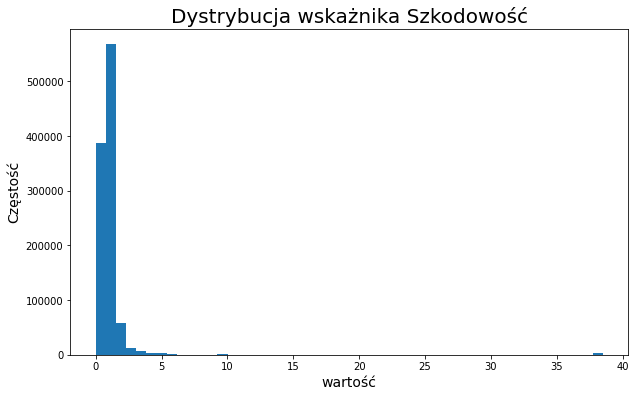

In [310]:
plt.figure(figsize = (10,6))
plt.title(label = 'Dystrybucja wskażnika Szkodowość', fontsize = 20)
plt.xlabel(xlabel = 'wartość', fontsize = 14)
plt.ylabel(ylabel = 'Częstość', fontsize = 14)
plt.hist(fakty['Szkodowosc'], bins = 50);

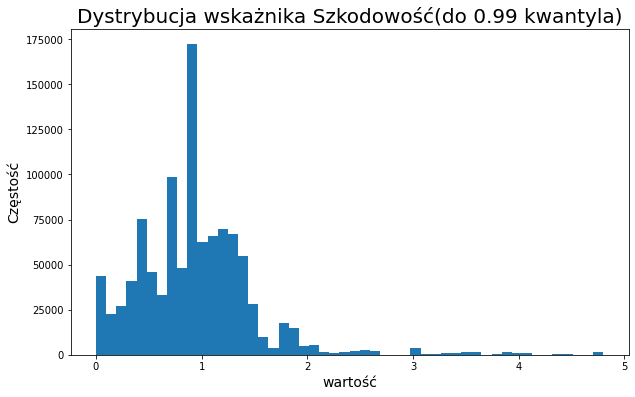

In [311]:
plt.figure(figsize = (10,6))
plt.title(label = 'Dystrybucja wskażnika Szkodowość(do 0.99 kwantyla)', fontsize = 20)
plt.xlabel(xlabel = 'wartość', fontsize = 14)
plt.ylabel(ylabel = 'Częstość', fontsize = 14)
plt.hist(fakty['Szkodowosc'][fakty['Szkodowosc'] < fakty['Szkodowosc'].quantile(0.99)], bins = 50);

In [321]:
print('Minimalna wartość Szkodowości:', fakty['Szkodowosc'].min(),'\n',
      'Mediana:', mode(fakty['Szkodowosc'])[0], '\n',
      'Maksymalna wartość:', fakty['Szkodowosc'].max())

Minimalna wartość Szkodowości: 0.0 
 Mediana: [0.8743075] 
 Maksymalna wartość: 38.5


## Marża

Wzór:25672 - 25667

Opis: Zysk po kosztach z ksiąg finansowych.

Uwagi:brak


In [30]:
g = fakty[fakty['LINE_ID'] ==25672]['DT_CUST_ID'].unique()
h = fakty[fakty['LINE_ID'] ==25667]['DT_CUST_ID'].unique()
j = []
for i in fakty['DT_CUST_ID'].unique():
  if (i in g) & (i in h):
    j.append(i)

In [31]:
df2 = fakty[fakty['DT_CUST_ID'].isin(c)]
print(df2.shape)
df2.head()

(1035356, 18)


,PER_ID,LINE_ID,UNIT_ID,VER_ID,CAT_ID,DRV_ID,INTCO_ID,PROJ_ID,ACC_ID,DT_UNIT_ID,DT_DRV_ID,DT_PROJ_ID,DT_GRUPA_KAPITALOWA_ID,DT_CUST_ID,VALUE,cat_id_name,ARPU,Szkodowosc
0,201201,25664,8308,900,4001,0,0,111869165,0,-8308,0,111869165,0,0,0.0,Abonament korporacyjny,0.0,0.105263
1,201201,25664,8103,900,4003,0,0,111869226,0,-8103,0,111869226,0,0,0.0,Abonament TPA,0.0,0.105263
2,201202,25664,8103,900,4003,0,0,111869226,0,-8103,0,111869226,0,0,0.0,Abonament TPA,0.0,0.105263
3,201203,25664,8103,900,4003,0,0,111869226,0,-8103,0,111869226,0,0,0.0,Abonament TPA,0.0,0.105263
4,201204,25664,8103,900,4003,0,0,111869226,0,-8103,0,111869226,0,0,0.0,Abonament TPA,0.0,0.105263


In [32]:
marza = df[(df['LINE_ID']==25672) & (df['DT_GRUPA_KAPITALOWA_ID'] ==0)].groupby('DT_CUST_ID')['VALUE'].sum()-\
df[(df['LINE_ID'] == 25667) &(df['DT_GRUPA_KAPITALOWA_ID']==0)].groupby('DT_CUST_ID')['VALUE'].sum()
marza = pd.DataFrame(marza)
marza.reset_index(inplace=True)
marza.head()

,DT_CUST_ID,VALUE
0,0,0.0
1,2451,80.0
2,40093,-40.0
3,44551,300.0
4,47830,740.0


In [33]:
marza2 = df[(df['LINE_ID']==25672)& (df['DT_GRUPA_KAPITALOWA_ID'] !=0)].groupby('DT_GRUPA_KAPITALOWA_ID')['VALUE'].sum()-\
df[(df['LINE_ID'] == 25667) &(df['DT_GRUPA_KAPITALOWA_ID']!=0)].groupby('DT_GRUPA_KAPITALOWA_ID')['VALUE'].sum()
marza2 = pd.DataFrame(marza2)
marza2.reset_index(inplace=True)
marza2.head()

,DT_GRUPA_KAPITALOWA_ID,VALUE
0,202,18040.0
1,203,34300.0
2,204,NaN
3,205,21690.0
4,206,12180.0


In [34]:
fakty = fakty.merge(marza, on = 'DT_CUST_ID', how = 'left')
fakty.rename(columns={"VALUE_x": "VALUE", "VALUE_y": "marza"}, inplace=True)
fakty = fakty.merge(marza2, on = 'DT_GRUPA_KAPITALOWA_ID', how = 'left')
fakty.rename(columns={"VALUE_x": "VALUE", "VALUE_y": "marza2"}, inplace=True)
fakty.head()

,PER_ID,LINE_ID,UNIT_ID,VER_ID,CAT_ID,DRV_ID,INTCO_ID,PROJ_ID,ACC_ID,DT_UNIT_ID,DT_DRV_ID,DT_PROJ_ID,DT_GRUPA_KAPITALOWA_ID,DT_CUST_ID,VALUE,cat_id_name,ARPU,Szkodowosc,marza,marza2
0,201201,25664,8308,900,4001,0,0,111869165,0,-8308,0,111869165,0,0,0.0,Abonament korporacyjny,0.0,0.105263,0.0,NaN
1,201201,25664,8103,900,4003,0,0,111869226,0,-8103,0,111869226,0,0,0.0,Abonament TPA,0.0,0.105263,0.0,NaN
2,201202,25664,8103,900,4003,0,0,111869226,0,-8103,0,111869226,0,0,0.0,Abonament TPA,0.0,0.105263,0.0,NaN
3,201203,25664,8103,900,4003,0,0,111869226,0,-8103,0,111869226,0,0,0.0,Abonament TPA,0.0,0.105263,0.0,NaN
4,201204,25664,8103,900,4003,0,0,111869226,0,-8103,0,111869226,0,0,0.0,Abonament TPA,0.0,0.105263,0.0,NaN


In [35]:
fakty['marza2'][fakty['DT_GRUPA_KAPITALOWA_ID']==0] = 0
fakty['marza'][fakty['DT_GRUPA_KAPITALOWA_ID']!=0] = 0

In [36]:
fakty['marza'].fillna(0,inplace = True)
fakty['marza2'].fillna(0,inplace = True)

In [330]:
fakty['marza'].max()

740.0

In [331]:
fakty['marza2'].max()

1283940.0

In [37]:
fakty['marza'] = fakty['marza']+fakty['marza2']
fakty.drop(['marza2'], axis = 1, inplace=True)
fakty.head()

,PER_ID,LINE_ID,UNIT_ID,VER_ID,CAT_ID,DRV_ID,INTCO_ID,PROJ_ID,ACC_ID,DT_UNIT_ID,DT_DRV_ID,DT_PROJ_ID,DT_GRUPA_KAPITALOWA_ID,DT_CUST_ID,VALUE,cat_id_name,ARPU,Szkodowosc,marza
0,201201,25664,8308,900,4001,0,0,111869165,0,-8308,0,111869165,0,0,0.0,Abonament korporacyjny,0.0,0.105263,0.0
1,201201,25664,8103,900,4003,0,0,111869226,0,-8103,0,111869226,0,0,0.0,Abonament TPA,0.0,0.105263,0.0
2,201202,25664,8103,900,4003,0,0,111869226,0,-8103,0,111869226,0,0,0.0,Abonament TPA,0.0,0.105263,0.0
3,201203,25664,8103,900,4003,0,0,111869226,0,-8103,0,111869226,0,0,0.0,Abonament TPA,0.0,0.105263,0.0
4,201204,25664,8103,900,4003,0,0,111869226,0,-8103,0,111869226,0,0,0.0,Abonament TPA,0.0,0.105263,0.0


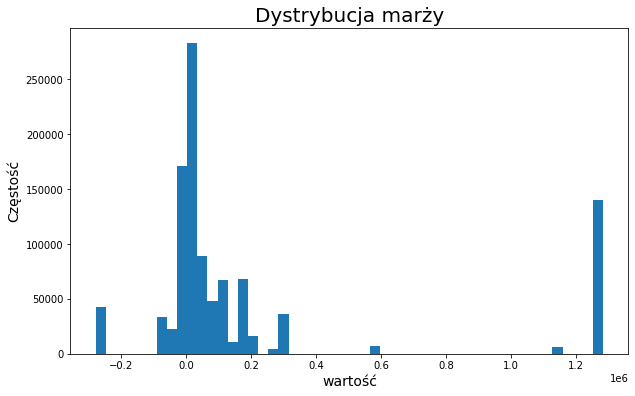

In [337]:
plt.figure(figsize = (10,6))
plt.title(label = 'Dystrybucja marży', fontsize = 20)
plt.xlabel(xlabel = 'wartość', fontsize = 14)
plt.ylabel(ylabel = 'Częstość', fontsize = 14)
plt.hist(fakty['marza'], bins = 50);

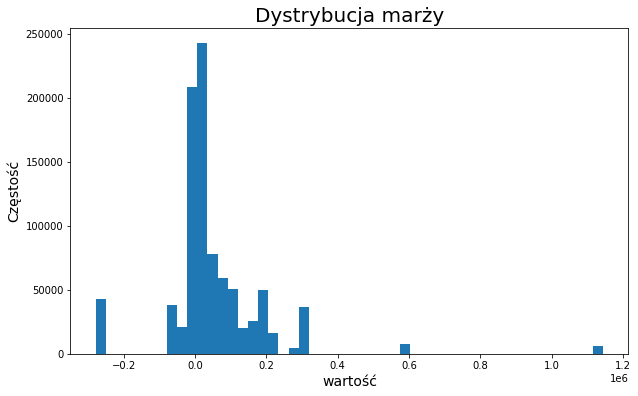

In [338]:
plt.figure(figsize = (10,6))
plt.title(label = 'Dystrybucja marży', fontsize = 20)
plt.xlabel(xlabel = 'wartość', fontsize = 14)
plt.ylabel(ylabel = 'Częstość', fontsize = 14)
plt.hist(fakty['marza'][fakty['marza'] < fakty['marza'].quantile(0.95)], bins = 50);

In [39]:
print('Minimalna wartość marży:', fakty['marza'].min(),'\n',
      'Mediana:', mode(fakty['marza'])[0], '\n',
      'Maksymalna wartość:', fakty['marza'].max())

Minimalna wartość marży: -277940.0 
 Mediana: [1283940.] 
 Maksymalna wartość: 1283940.0


#Jako nowe spostzreżenia/wskaźniki postanowiłem zaprezentować statystyki opisowe dotyczące wskaźników z podziałem na miasta

In [39]:
from google.colab import files
uploaded = files.upload()

Saving proj_id.csv to proj_id.csv


In [43]:
proj_id = pd.read_csv(io.BytesIO(uploaded['proj_id.csv']), sep =';', encoding= 'unicode_escape')
proj_id.head()

,MEM_ID,MEM_NAME,MEM_DESC
0,111613269,Mielec,Mielec
1,111869082,£ód,£ód
2,111869088,Lublin,Lublin
3,111869090,Le¿ajsk,Le¿ajsk
4,111869096,Bielsko-Bia³a,Bielsko-Bia³a


In [45]:
proj_id.rename(columns={"MEM_ID": "PROJ_ID"}, inplace=True)

In [47]:
fakty = fakty.merge(proj_id[['PROJ_ID', 'MEM_NAME']], on = 'PROJ_ID', how = 'left')
fakty.head()

,PER_ID,LINE_ID,UNIT_ID,VER_ID,CAT_ID,DRV_ID,INTCO_ID,PROJ_ID,ACC_ID,DT_UNIT_ID,DT_DRV_ID,DT_PROJ_ID,DT_GRUPA_KAPITALOWA_ID,DT_CUST_ID,VALUE,cat_id_name,ARPU,Szkodowosc,marza,MEM_NAME
0,201201,25664,8308,900,4001,0,0,111869165,0,-8308,0,111869165,0,0,0.0,Abonament korporacyjny,0.0,0.105263,0.0,Wa³brzych
1,201201,25664,8103,900,4003,0,0,111869226,0,-8103,0,111869226,0,0,0.0,Abonament TPA,0.0,0.105263,0.0,Gorzów Wielkopolski
2,201202,25664,8103,900,4003,0,0,111869226,0,-8103,0,111869226,0,0,0.0,Abonament TPA,0.0,0.105263,0.0,Gorzów Wielkopolski
3,201203,25664,8103,900,4003,0,0,111869226,0,-8103,0,111869226,0,0,0.0,Abonament TPA,0.0,0.105263,0.0,Gorzów Wielkopolski
4,201204,25664,8103,900,4003,0,0,111869226,0,-8103,0,111869226,0,0,0.0,Abonament TPA,0.0,0.105263,0.0,Gorzów Wielkopolski


In [48]:
fakty.rename(columns={"MEM_NAME": "Miasto"}, inplace=True)

In [52]:
fakty.groupby('Miasto')['ARPU'].agg(['min', 'mean', 'std', 'max'])

,min,mean,std,max
Miasto,,,,
Bia³ystok,0.0,33.066202,119.965778,2516.5
Bielsko-Bia³a,0.0,32.170025,100.939731,2516.5
Brodnica,0.0,31.750439,107.478459,2516.5
Bydgoszcz,0.0,47.302946,209.224182,2516.5
Elbl¹g,0.0,31.096704,117.128444,2516.5
Gdañsk,0.0,42.995876,217.706651,2516.5
Gdynia,0.0,31.654923,113.877979,2516.5
Gorzów Wielkopolski,0.0,43.718007,199.068627,2516.5
Kalisz,0.0,34.513613,120.173021,2516.5


In [53]:
fakty.groupby('Miasto')['Szkodowosc'].agg(['min', 'mean', 'std', 'max'])

,min,mean,std,max
Miasto,,,,
Bia³ystok,0.0,1.046082,1.906904,38.5
Bielsko-Bia³a,0.0,1.081065,1.718843,38.5
Brodnica,0.0,0.914854,1.681599,38.5
Bydgoszcz,0.0,1.278759,3.245806,38.5
Elbl¹g,0.0,0.983286,1.892094,38.5
Gdañsk,0.0,1.062880,3.327655,38.5
Gdynia,0.0,0.960332,1.759048,38.5
Gorzów Wielkopolski,0.0,1.147879,3.021905,38.5
Kalisz,0.0,1.172057,1.931791,38.5


In [55]:
fakty.groupby('Miasto')['marza'].agg(['min', 'mean', 'std', 'max'])

,min,mean,std,max
Miasto,,,,
Bia³ystok,-277940.0,180461.216820,399250.781302,1283940.0
Bielsko-Bia³a,-277940.0,164889.939789,415614.682052,1283940.0
Brodnica,-277940.0,234614.211124,469165.524582,1283940.0
Bydgoszcz,-277940.0,201465.630837,418876.349483,1283940.0
Elbl¹g,-277940.0,240076.474270,472596.746197,1283940.0
Gdañsk,-277940.0,315202.723362,487388.194949,1283940.0
Gdynia,-277940.0,281179.316654,490626.069355,1283940.0
Gorzów Wielkopolski,-277940.0,201940.688300,434910.577629,1283940.0
Kalisz,-277940.0,162622.990317,394096.243864,1283940.0


Można zauważyć, że wartość minimalna i maxymalna dla wszystkich wskażników we wszystkich miastach jest taka sama. Jest to spowodowane, że grupa kapitałowa(1195), przy której występuję wartość maksymalna(ARPU i Szkodowość, dla marzy jest to grupa kapitałowa 1150) występuje we wszystkich miastach, a wartość minimalna występuje w wielu grupach kapitałowych.
Poniżej sprawdzenie tych faktów:

In [62]:
#Ilość grup kapitałowych, w których występuje wartość minimalna w porównaniu to ilości całkowitej
len(fakty[fakty['ARPU'] == fakty['ARPU'].min()]['DT_GRUPA_KAPITALOWA_ID'].unique()), fakty['DT_GRUPA_KAPITALOWA_ID'].nunique()

(399, 901)

In [70]:
#Grupa kapitałowa, w której występuje wartość maksymalna
fakty[fakty['ARPU'] == fakty['ARPU'].max()]['DT_GRUPA_KAPITALOWA_ID'].unique()

array([1195])

In [67]:
#Ilość miast, w któeych występuje grupa kapitałowa 1195 w porównaniu do wszystkich miast
len(fakty[fakty['ARPU'] == fakty['ARPU'].max()]['Miasto'].unique()), fakty['Miasto'].nunique()

(38, 38)

Analogicznie dla pozostałych dwóch miar

In [71]:
fakty[fakty['Szkodowosc'] == fakty['Szkodowosc'].max()]['DT_GRUPA_KAPITALOWA_ID'].unique()

array([1195])

In [59]:
fakty[fakty['marza'] == fakty['marza'].max()]['DT_GRUPA_KAPITALOWA_ID'].unique()

array([1150])

In [72]:
len(fakty[fakty['marza'] == fakty['marza'].max()]['Miasto'].unique()), fakty['Miasto'].nunique()

(38, 38)

In [ ]:
fakty.set_index('PER_ID')[(fakty['LINE_ID']==25672)& (fakty['DT_GRUPA_KAPITALOWA_ID'] !=0)].groupby(['DT_GRUPA_KAPITALOWA_ID'])['VALUE'].sum()-\
fakty.set_index('PER_ID')[(fakty['LINE_ID'] == 25667) &(fakty['DT_GRUPA_KAPITALOWA_ID']!=0)].groupby(['DT_GRUPA_KAPITALOWA_ID'])['VALUE'].sum().resample('Q-JAN', convention='end').agg('mean')


In [38]:
fakty[(fakty['LINE_ID']==25672)& (fakty['DT_GRUPA_KAPITALOWA_ID'] !=0)].groupby(['DT_GRUPA_KAPITALOWA_ID', 'PER_ID'])['VALUE'].sum()-\
fakty[(fakty['LINE_ID'] == 25667) &(fakty['DT_GRUPA_KAPITALOWA_ID']!=0)].groupby(['DT_GRUPA_KAPITALOWA_ID', 'PER_ID'])['VALUE'].sum().rolling(3).mean()

DT_GRUPA_KAPITALOWA_ID  PER_ID
202                     201201            NaN
                        201202            NaN
                        201203    2720.000000
                        201204    2580.000000
                        201205    2963.333333
                                     ...     
1377                    201509   -2100.000000
1378                    201509            NaN
1380                    201509            NaN
1381                    201509            NaN
1382                    201509            NaN
Name: VALUE, Length: 7008, dtype: float64